# Insertion Sort vs Counting Sort
###### Tiziano Talini - Matricola 7079207

## Introduzione

Nel contesto dell'informatica e dell'analisi degli algoritmi, il confronto tra diverse tecniche di ordinamento è fondamentale per comprendere l'efficienza di ciascun metodo in scenari differenti. In questo progetto, sono stati analizzati e confrontati due algoritmi di ordinamento: Insertion Sort e Counting Sort. L'obiettivo era quello di esplorare il funzionamento di entrambi e testarne le prestazioni su insiemi di dati di diverse dimensioni e caratteristiche. La differenza essenziale tra questi due algoritmi è che Insertion Sort è un algoritmo basato sui confronti, mentre Conting Sort conta il numero di occorrenze di ogni elemento e stabilisce sulla base di questo la loro posizione finale nell'array ordinato. I risultati ottenuti permettono di delineare quali algoritmi siano più adatti in base alla natura dei dati e ai requisiti di tempo ed efficienza di memoria.

## Insertion Sort

Insertion Sort è un algoritmo di ordinamento semplice e intuitivo che imita il modo in cui molte persone ordinano manualmente. Questo algoritmo è di tipo in-place, il che significa che non richiede memoria aggiuntiva oltre a quella già utilizzata per memorizzare l'array da ordinare.

Il funzionamento di Insertion Sort può essere descritto nei seguenti passi:

1. Si assume che il primo elemento dell'array sia già ordinato.

2. Si procede con il secondo elemento, confrontandolo con il primo. Se il secondo elemento è più piccolo, viene inserito nella posizione corretta, spostando l'elemento maggiore verso destra.

3. Questo processo viene ripetuto per ogni elemento successivo, confrontandolo con gli elementi già ordinati e inserendolo nella posizione corretta.

#### Caratteristiche:

- **Complessità temporale**:
    - caso migliore: _O(n)_ (array già ordinato)
    - caso medio e peggiore: _O(n^2)_ (array randomico o ordinato al contrario)
- **Complessità spaziale**: _O(1)_ (dato che ordina in-place)
- **Stabilità**: l'algoritmo è stabile ovvero preserva l'ordine iniziale tra elementi uguali
- Semplice da implementare
- Inefficiente per insiemi di dati di grandi dimensioni a causa della complessità temporale quadratica

Di seguito l'implementazione del codice:

In [20]:
def InsertionSort(A):
    for j in range(2,len(A)):
        key = A[j]
        i = j - 1
        while i > 0 and A[i] > key:
            A[i + 1] = A[i]
            i = i - 1
        A[i + 1] = key

In [21]:
A = [5, 3, 7, 4, 5, 1, 2]
InsertionSort(A)
print(A)

[5, 1, 2, 3, 4, 5, 7]


## Counting Sort

Counting Sort è un algoritmo di ordinamento non basato sui confronti, progettato per insiemi di dati con valori interi in un intervallo limitato. L’idea principale è quella di contare il numero di occorrenze di ciascun valore e utilizzare queste informazioni per determinare le posizioni degli elementi ordinati. L'algoritmo lavora creando un secondo array nel quale il valore dell'elemento da ordinare nel primo array funge da indice di posizione per il secondo array, mentre il valore di questo nuovo array è il numero di occorrenze del suddetto elemento. Questo rende l'algoritmo ideale per intervalli limitati di dati, dato che la complessità spaziale cresce linearmente con l'intervallo massimo di valori (max - min)

I passi principali di Counting Sort sono:

1. Identificare il valore massimo nell'array.
2. Creare un array di conteggio con dimensione pari al valore massimo + 1, inizializzandolo a zero.
3. Per ogni elemento nell'array originale, incrementare il valore corrispondente nell'array di conteggio.
4. Calcolare le posizioni cumulative nell'array di conteggio.
5. Usare l'array di conteggio per posizionare ciascun elemento dell'array originale nel risultato finale, mantenendo l'ordine.

#### Caratteristiche:

 - **Complessità temporale**: O(n + k), dove _n_ è il numero di elementi e _k_ il valore massimo dell'array (non possiede casi migliori o peggiori perché non basato sui confronti)
 - **Complessità spaziale**: O(n + k) (Perché richiede memoria aggiuntiva per l'array di conteggio e l'array ordinato)
 - **Stabilità**: l'algoritmo è stabile
 - Molto efficiente per insiemi di dati di grandi dimensioni su un intervallo limitato di valori
 - Funziona solamente con dati discreti, come numeri interi, non puà fare il sorting di numeri razionali o reali

 Di seguito l'implementazione del codice:

In [22]:
def CountingSort(arr):
    max_val = max(arr)
    counts = [0] * (max_val + 1)
    sorted = [0] * len(arr)
    for i in range(0, len(arr)):
        counts[arr[i]] += 1
    for i in range(1, max_val+1):
        counts[i] = counts[i] + counts[i-1]
    for key in arr[::-1]:
        sorted[counts[key]-1] = key
        counts[key] -= 1
    return sorted

In [23]:
A = [4, 2, 2, 8, 3, 3, 1]
sorted = CountingSort(A)
print(sorted)

[1, 2, 2, 3, 3, 4, 8]


## Descrizione dei Test
Per mettere alla prova le prestazioni dei due algoritmi effettueremo dei test che andranno ad analizzare il loro comportamento di fronte a diversi tipi di input di dimensioni diverse.

Ci serviremo dunque di una funzione che avrà il compito di generare dei grafici che mostrino l'andamento asintotico degli algoritmi di ordinamento. La funzione prende in ingresso diversi parametri:

- _algType_ indica su quale algoritmo viene eseguito il test (0 per il Selection-Sort, 1 per il Merge-Sort);
- _insertType_ indica il metodo di inserimento dei valori (0 per quello sequenziale, 1 per quello casuale);
- _arrayDim_ rappresenta la dimensione massima dell'array su cui eseguiamo il test;
- _plot_ è un booleano che serve per decidere di stampare subito i risultati o salvarli per utilizzarli in un secondo momento.

A seconda dei parametri in ingresso, viene allocato un array progressivamente più grande ordinato casualmente o randomicamente, poi viene chiamato uno o l'altro algoritmo di ordinamento e ne viene misurato il tempo di esecuzione. La formula utilizzata per ottenere i punti del grafico è: $$y_n = (end_n - start_n)/n + y_{n-1}$$


In [49]:
import matplotlib.pyplot as plt
import numpy as np
import time
import random

def plotSortGraph(algType, insertType, arrayDim, plot=True):
    x, y = [], []
    for i in range(1, arrayDim, 5):
        x.append(i)
        A = np.arange(i) if insertType == 0 else random.sample(range(i), i)
        if algType == 0:
            start = time.perf_counter()
            InsertionSort(A)
            end = time.perf_counter()
        else:
            start = time.perf_counter()
            sorted = CountingSort(A)
            end = time.perf_counter()
        z = y[-1] if (len(y) != 0) else 0
        y.append((end - start) / i + z)
    if plot:
        plt.plot(x, y)
        title = 'Insertion-Sort' if algType == 0 else 'Counting-Sort'
        title += ' on Ordered List ' if insertType == 0 else ' on Randomized List '
        title += str(arrayDim)
        plt.title(title)
        plt.show()
    else:
        return x, y

Effettuiamo adesso i test per array di dimensioni 50, 200, 500 e 1000 elementi

### 50 elementi

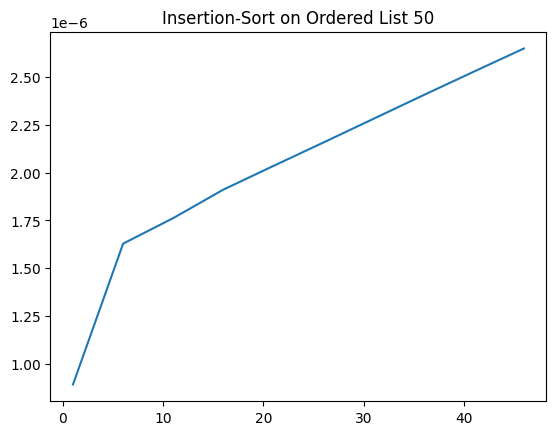

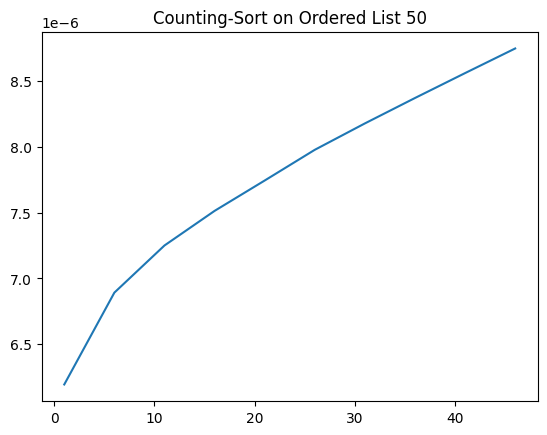

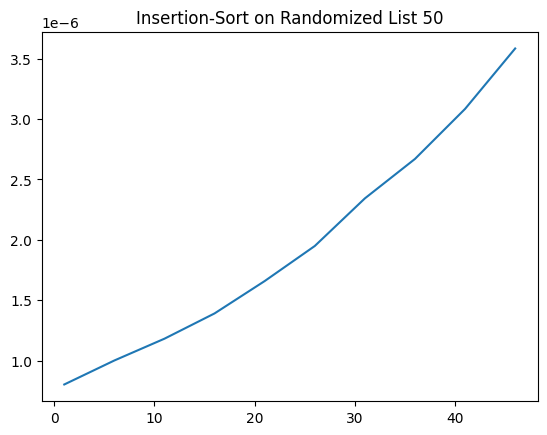

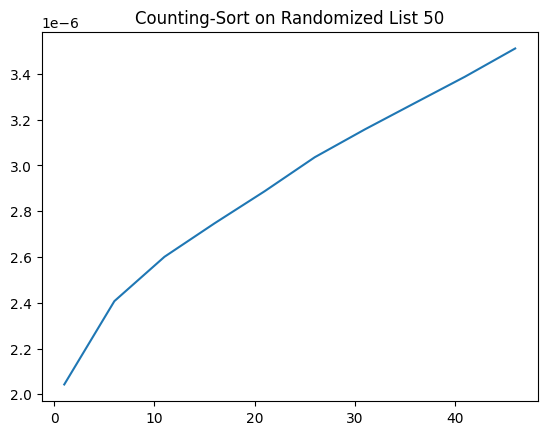

[[None, None], [None, None]]

In [25]:
[[plotSortGraph(i, j, 50) for i in range(2)] for j in range(2)]

### 200 elementi

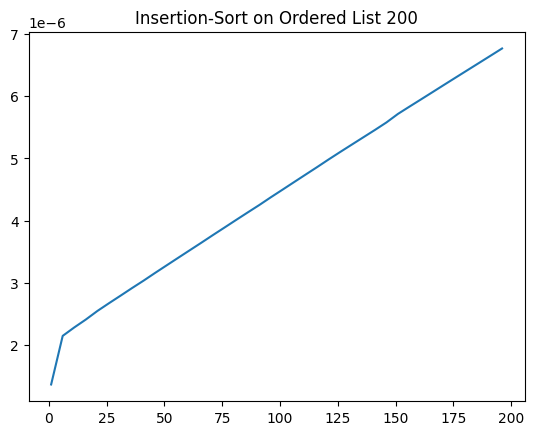

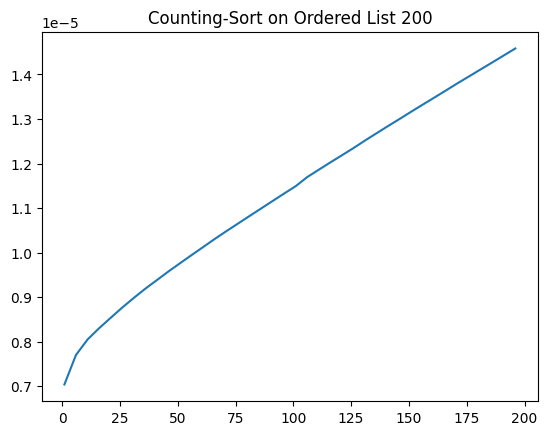

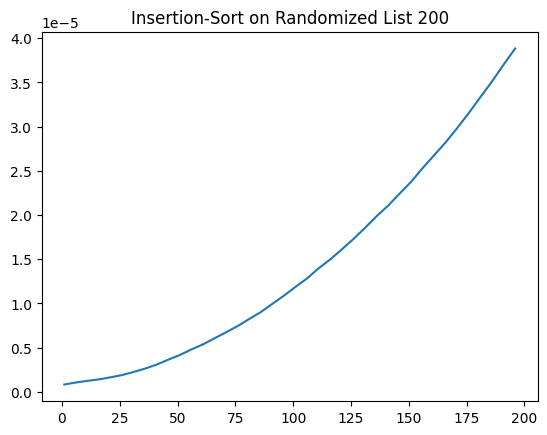

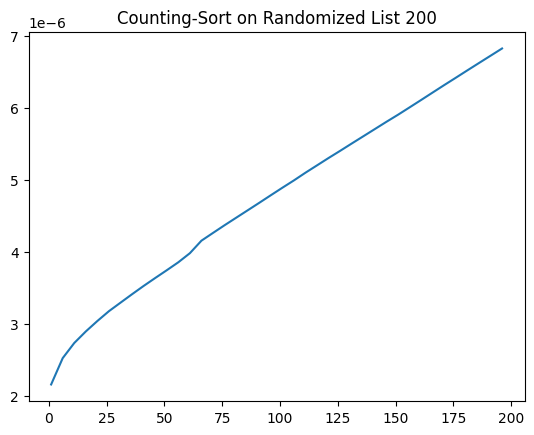

[[None, None], [None, None]]

In [26]:
[[plotSortGraph(i, j, 200) for i in range(2)] for j in range(2)]

### 500 elementi

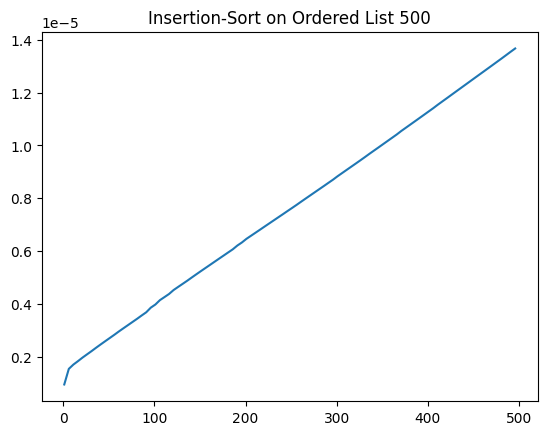

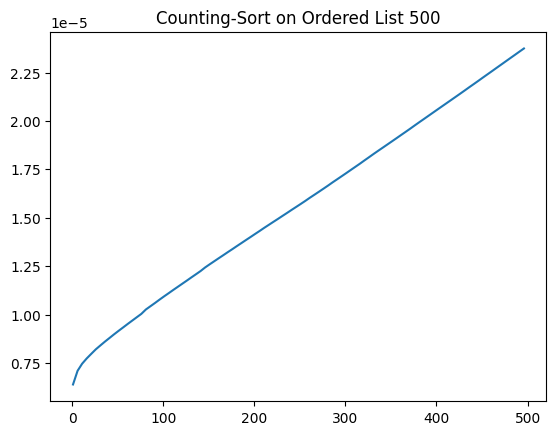

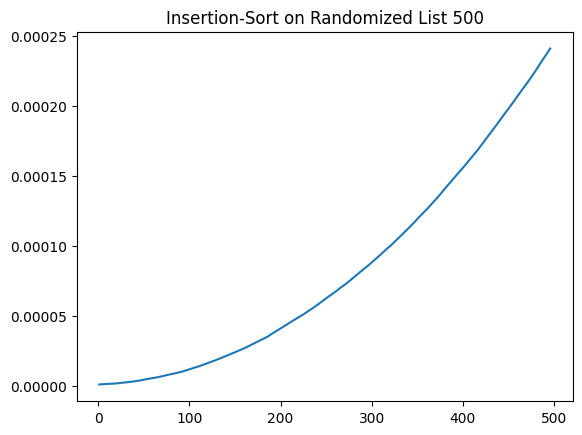

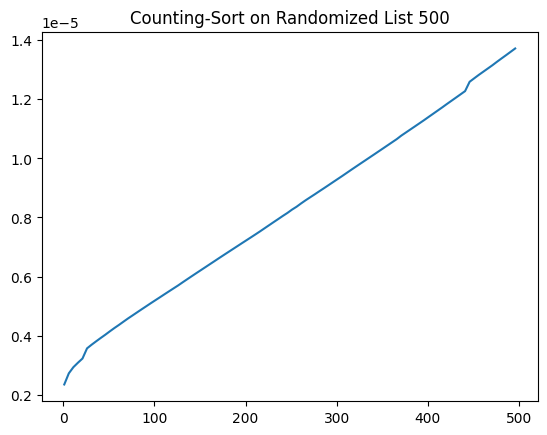

[[None, None], [None, None]]

In [27]:
[[plotSortGraph(i, j, 500) for i in range(2)] for j in range(2)]

### 1000 elementi

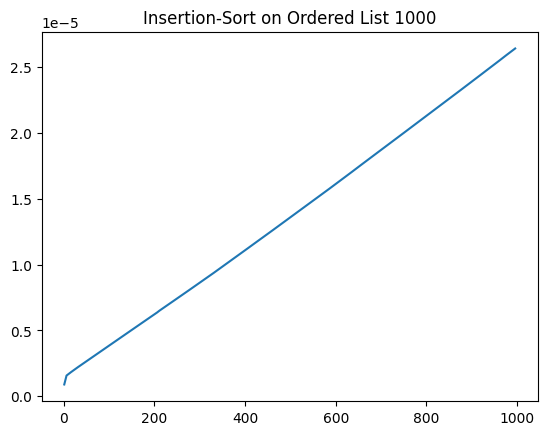

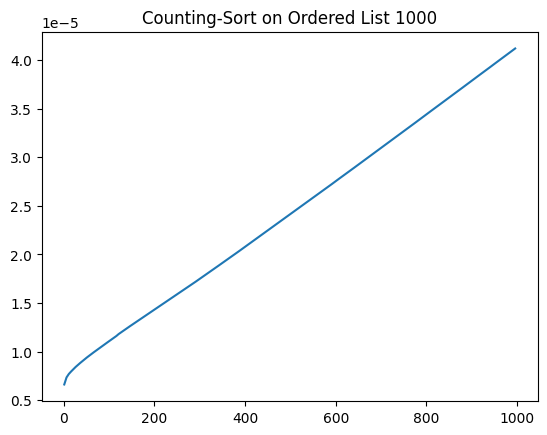

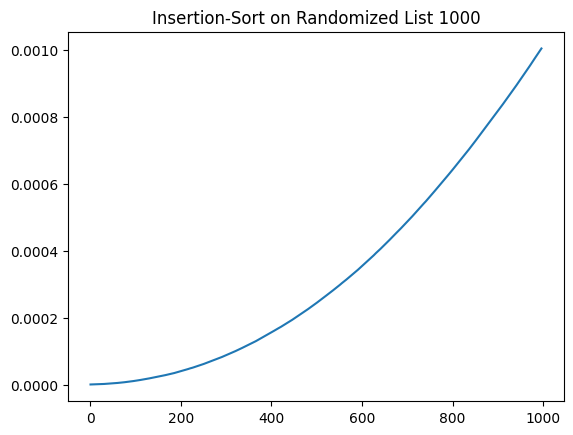

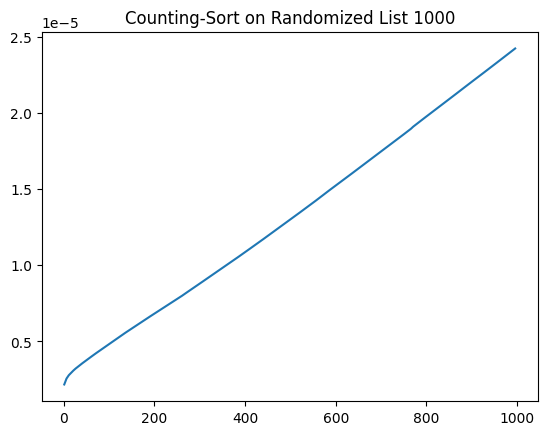

[[None, None], [None, None]]

In [28]:
[[plotSortGraph(i, j, 1000) for i in range(2)] for j in range(2)]

In tutti i e quattro i casi si può chiaramente vedere come la complessità dell'algoritmo di Insertion-Sort sia quadratica, ovvero $θ(n^2)$, mentre quella dell'algoritmo di Counting-Sort risulta uguale a $θ(n)$. Osserviamo inoltre che le prestazioni degli algoritmi variano notevolmente nel caso in cui l'array sia già ordinato oppure no: insertion sort risolve il problema in $O(n)$ mentre Counting Sort in $O(n+k)$ come già detto in precedenza. In particolare nei grafici successivi potremo quindi vedere proprio il fattore k di differenza nel caso in cui le liste siano ordinate già in partenza.

Procediamo quindi a stampare un grafico che ci permetta di confrontare direttamente le prestazioni dei due diversi approcci, ponendo arrayDim = 1000


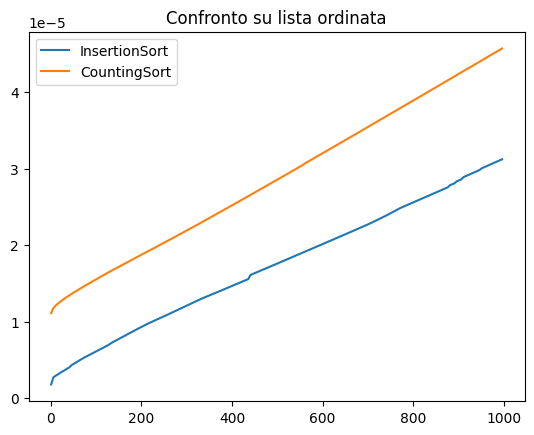

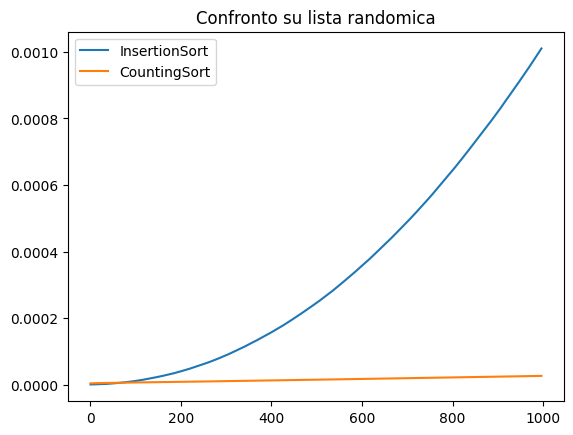

In [67]:
x1, y1 = plotSortGraph(0, 0, 1000, False)
x2, y2 = plotSortGraph(1, 0, 1000, False)
plt.plot(x1, y1, label='InsertionSort')
plt.plot(x2, y2, label='CountingSort')
plt.title('Confronto su lista ordinata')
plt.legend()
plt.show()
x1, y1 = plotSortGraph(0, 1, 1000, False)
x2, y2 = plotSortGraph(1, 1, 1000, False)
plt.plot(x1, y1, label='InsertionSort')
plt.plot(x2, y2, label='CountingSort')
plt.title('Confronto su lista randomica')
plt.legend()
plt.show()